EOF
Execution time:  19.916 seconds.
128 nodes, per-node= <8 heavy+ 16 light>
Total size 131.40625 kbytes, 
Heavy part: 109.40625 kbytes
Light part: 22.0 kbytes
Precision:  0.524
heavy_are: 0.238,heavy_aae:20.613
all_are: 346.905,all_aae: 360.466
Estimate time:   8.203 seconds.


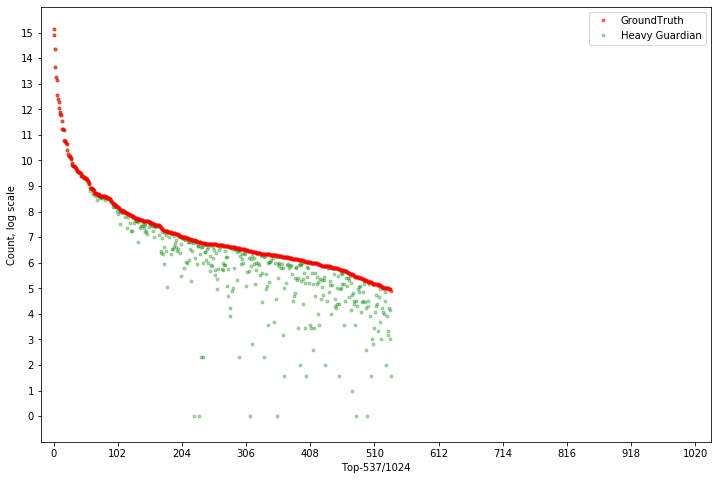

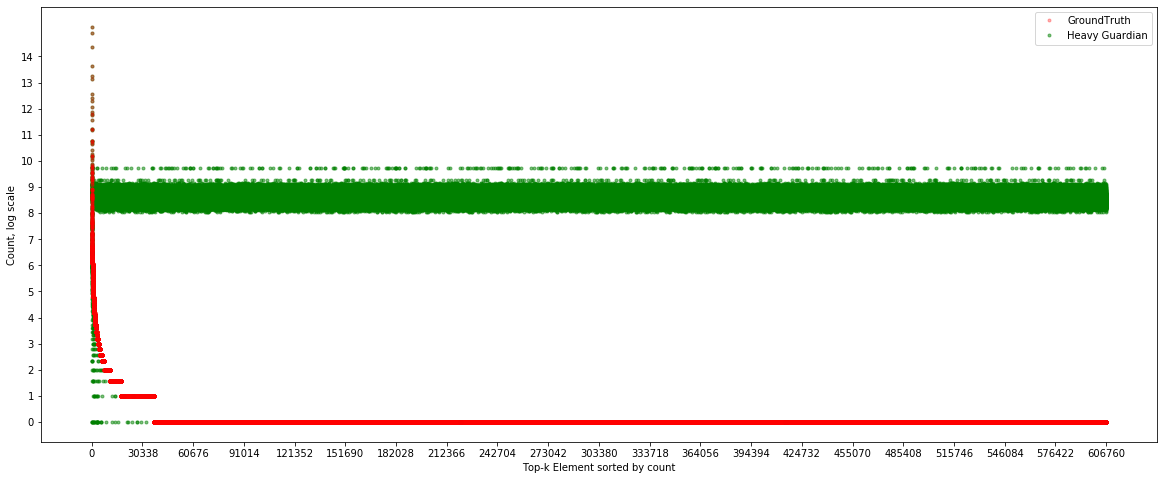

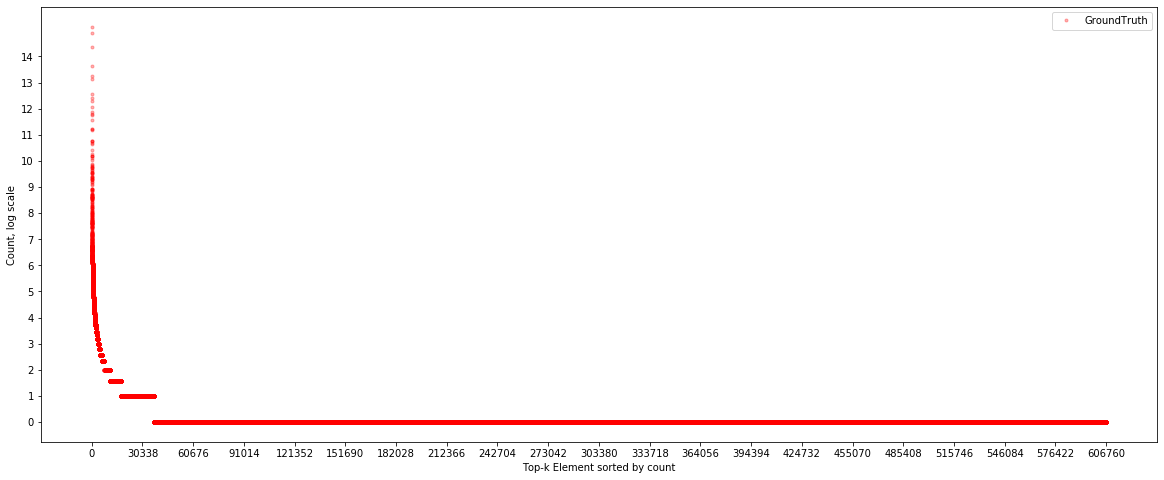

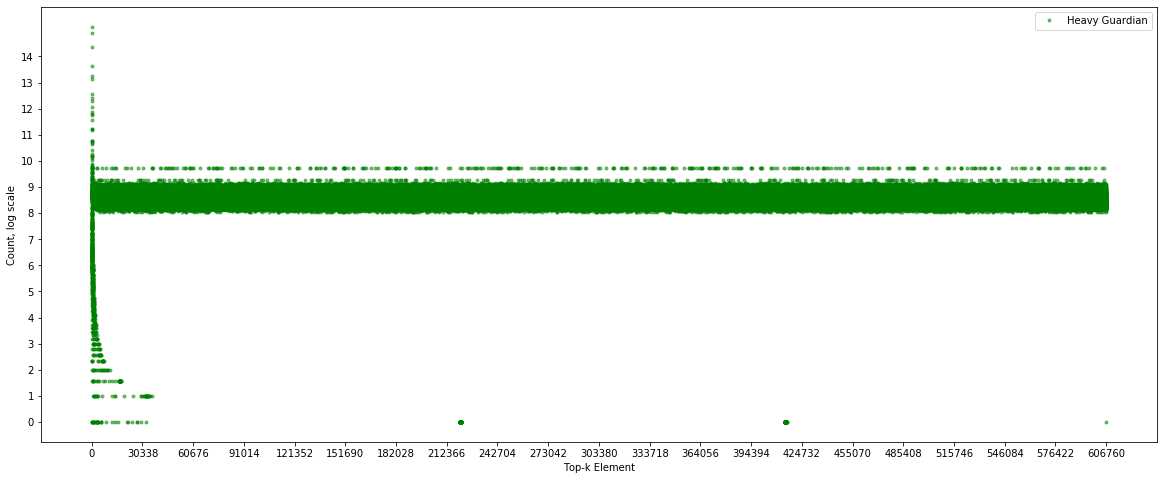

In [1]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=128
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  21.701 seconds.
200 nodes, per-node= <8 heavy+ 16 light>
Total size 228.0703125 kbytes, 
Heavy part: 193.6953125 kbytes
Light part: 34.375 kbytes
Precision:  0.640
heavy_are: 0.219,heavy_aae:16.206
all_are: 219.083,all_aae: 227.554
Estimate time:   8.497 seconds.


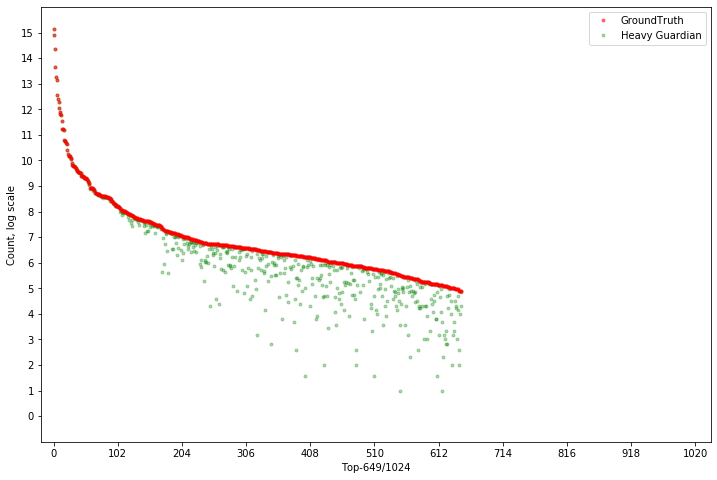

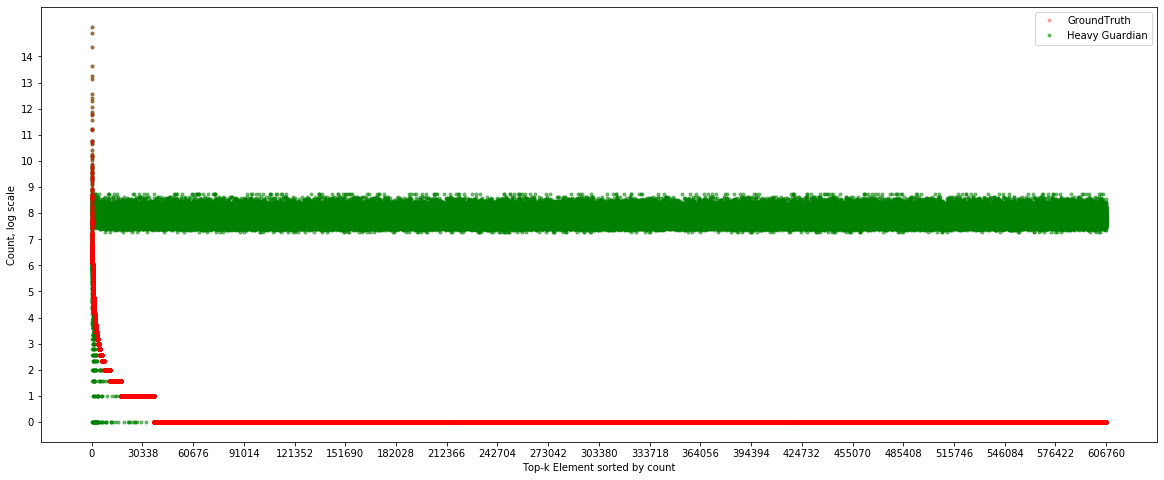

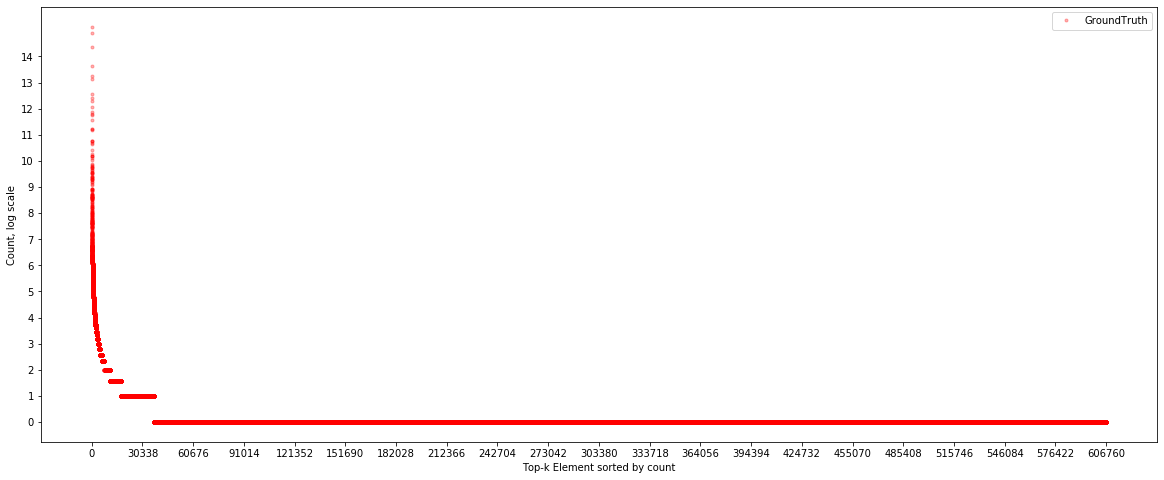

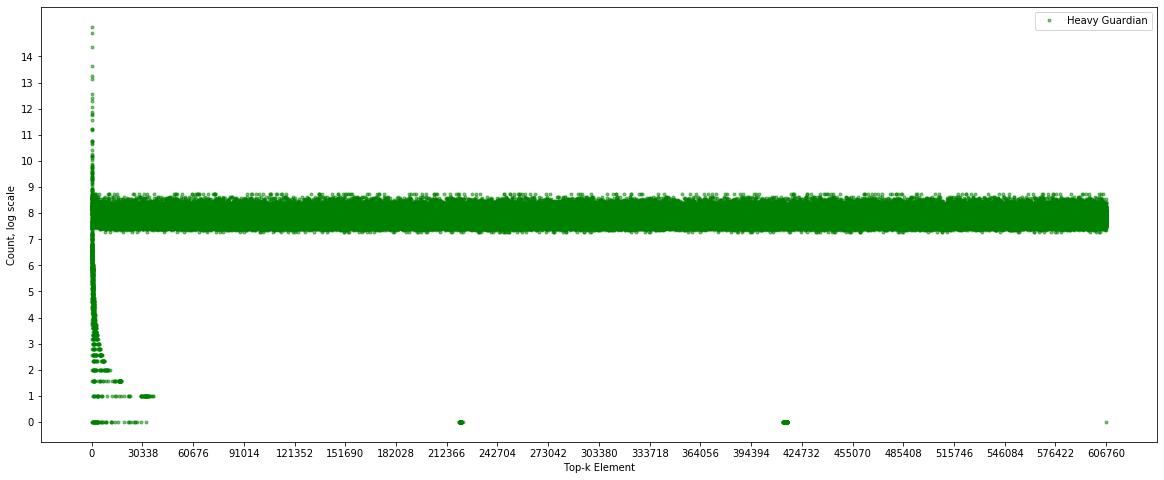

In [2]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=200
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  20.037 seconds.
300 nodes, per-node= <8 heavy+ 16 light>
Total size 314.8125 kbytes, 
Heavy part: 263.25 kbytes
Light part: 51.5625 kbytes
Precision:  0.758
heavy_are: 0.198,heavy_aae:13.201
all_are: 144.189,all_aae: 149.696
Estimate time:  13.952 seconds.


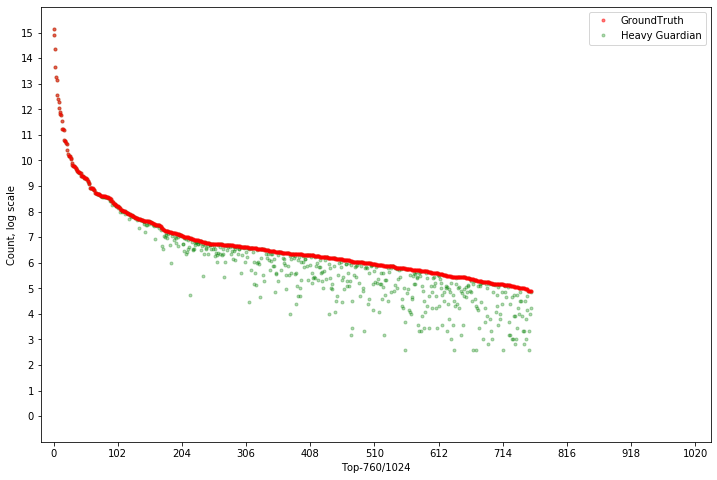

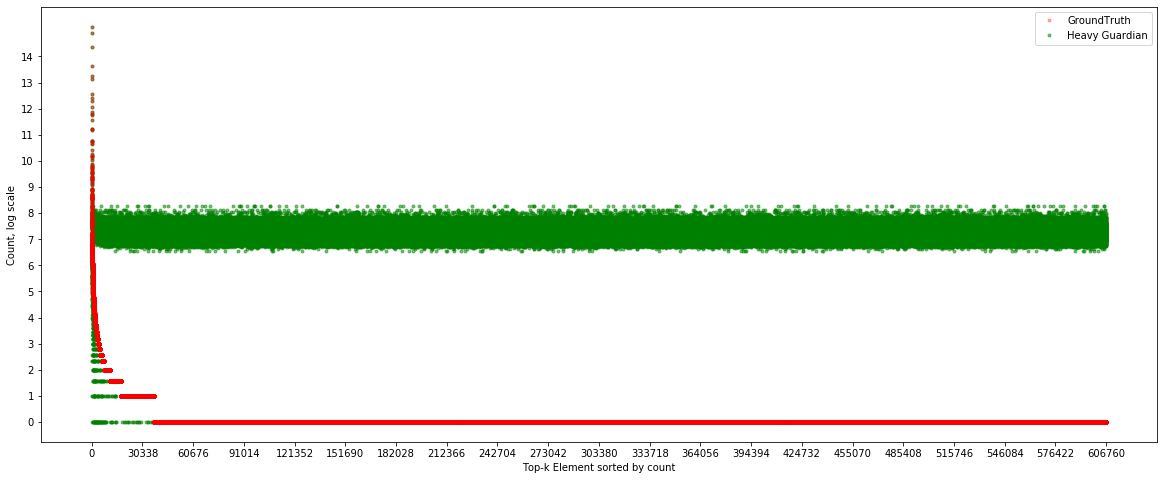

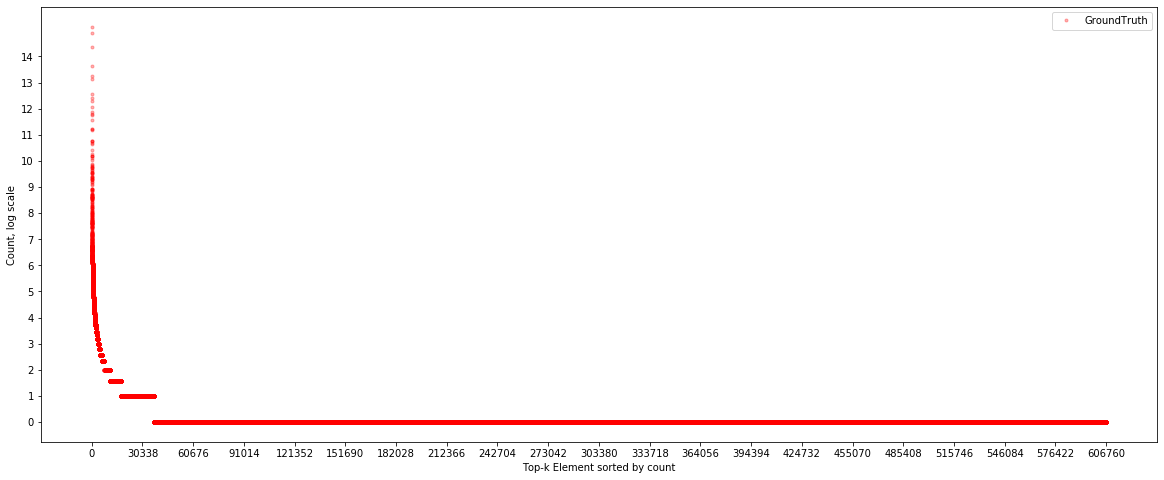

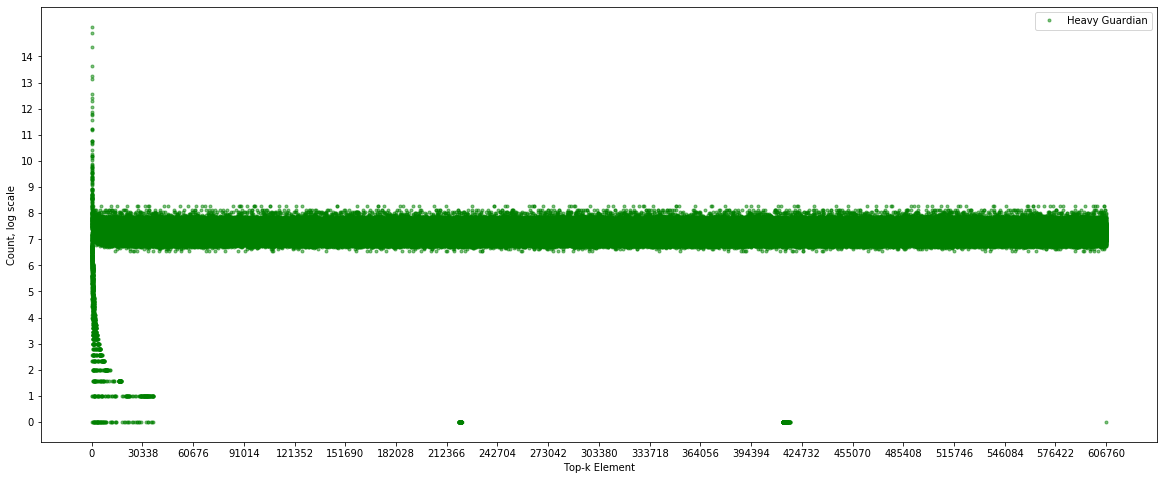

In [3]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=300
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  28.734 seconds.
400 nodes, per-node= <8 heavy+ 16 light>
Total size 468.5 kbytes, 
Heavy part: 399.75 kbytes
Light part: 68.75 kbytes
Precision:  0.831
heavy_are: 0.153,heavy_aae: 9.990
all_are: 106.993,all_aae: 111.047
Estimate time:  10.599 seconds.


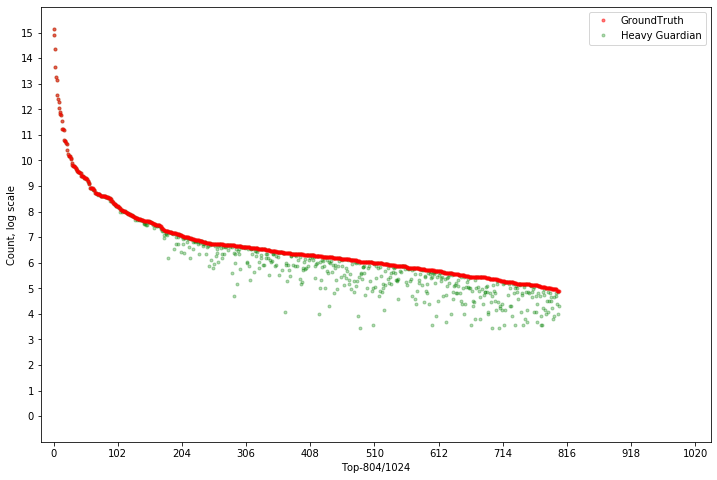

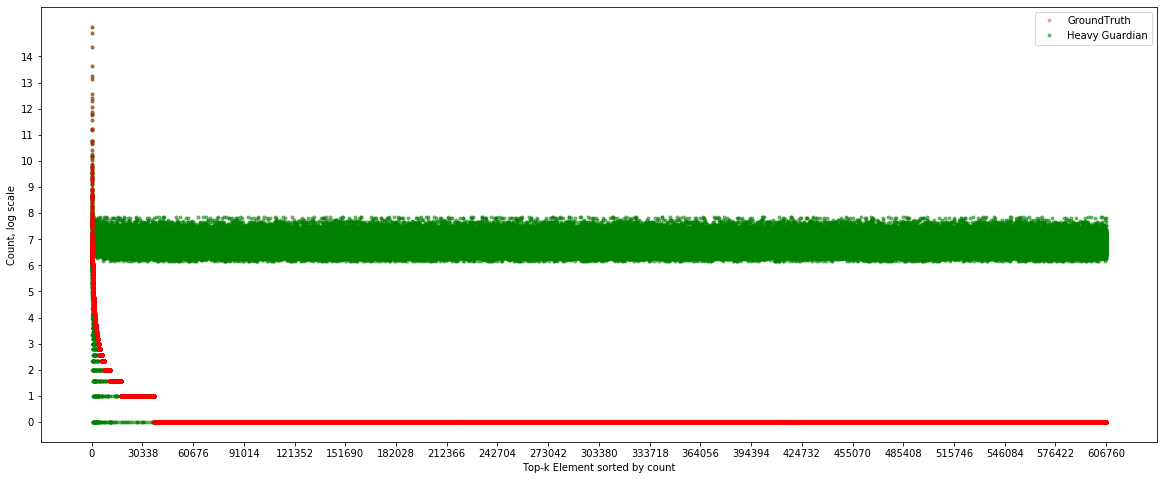

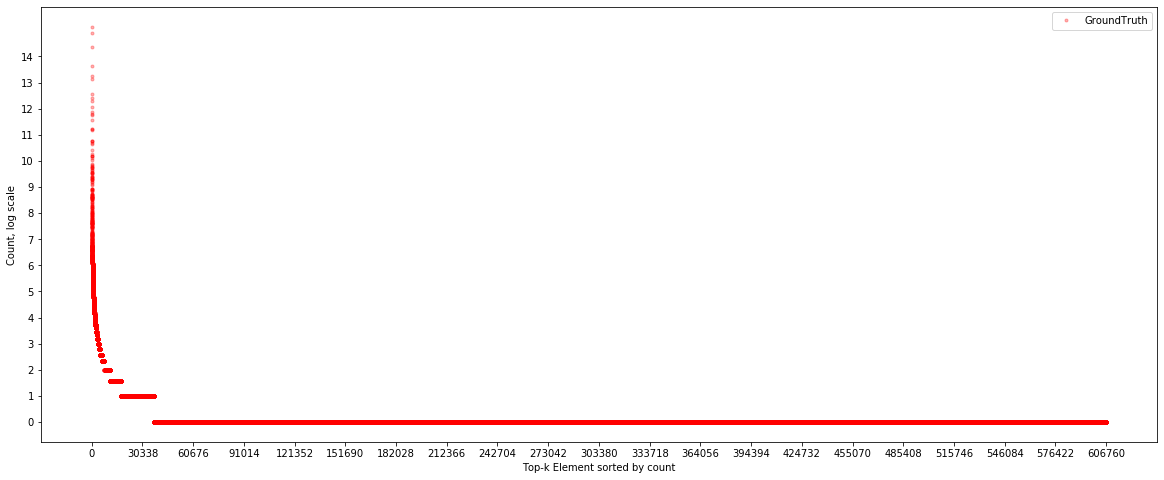

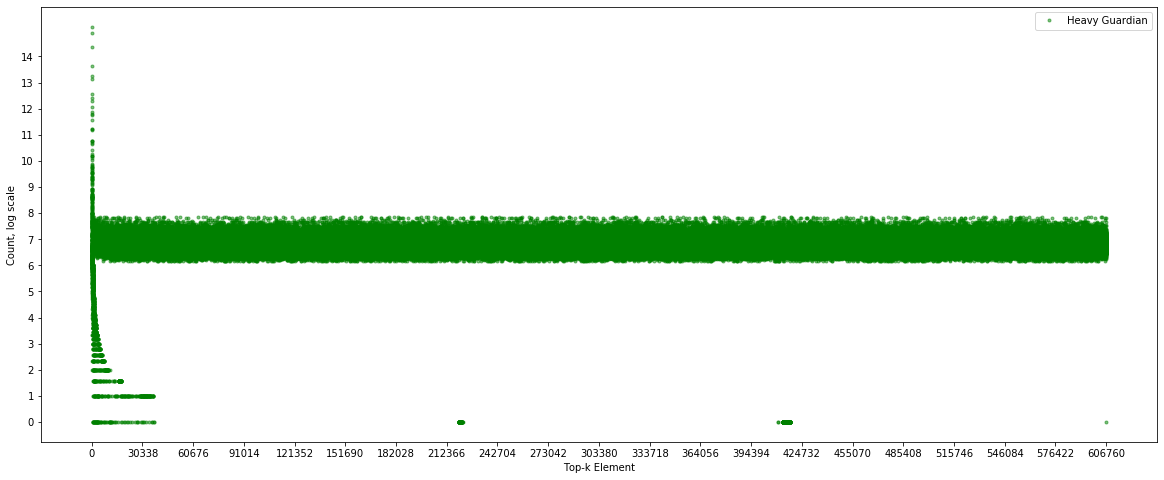

In [4]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=400
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  23.070 seconds.
500 nodes, per-node= <8 heavy+ 16 light>
Total size 554.4296875 kbytes, 
Heavy part: 468.4921875 kbytes
Light part: 85.9375 kbytes
Precision:  0.870
heavy_are: 0.127,heavy_aae: 7.840
all_are:  84.868,all_aae:  88.051
Estimate time:  11.324 seconds.


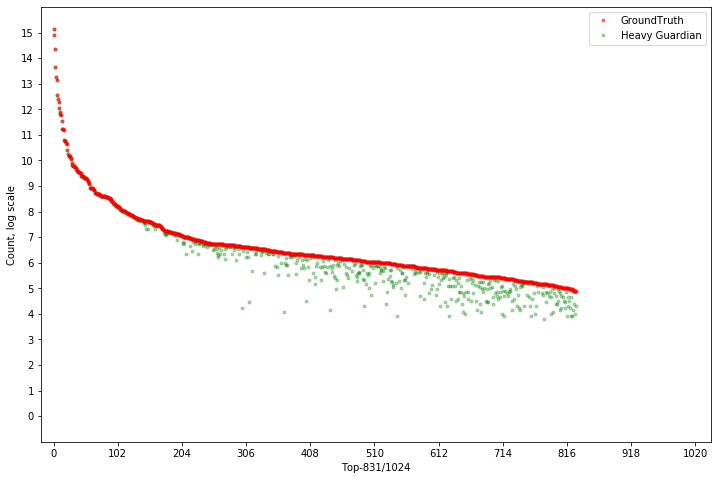

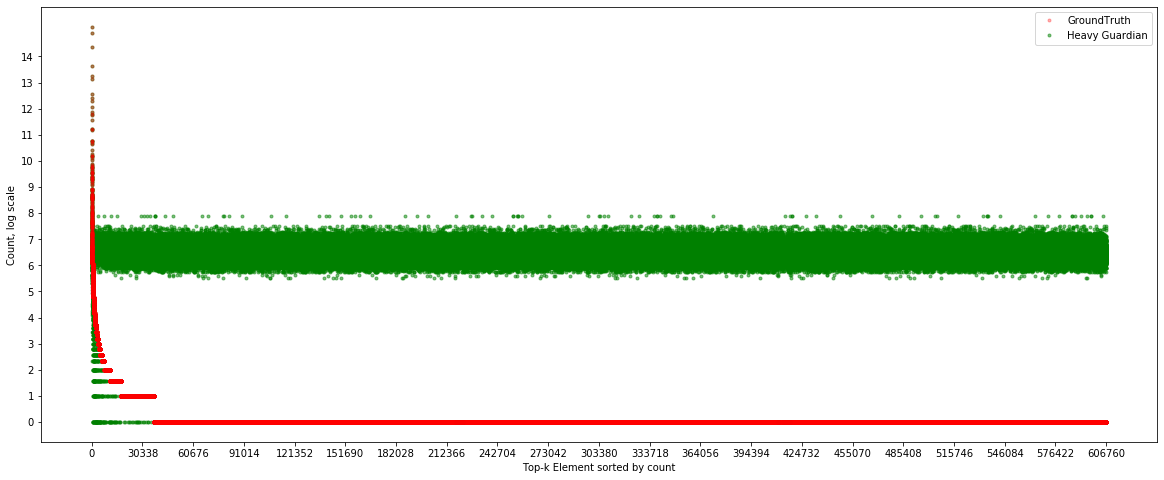

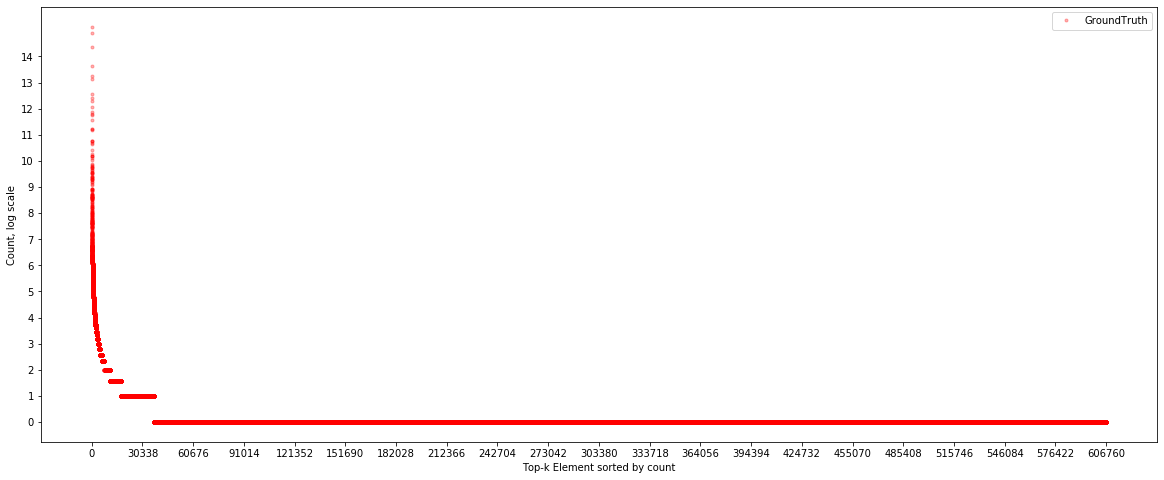

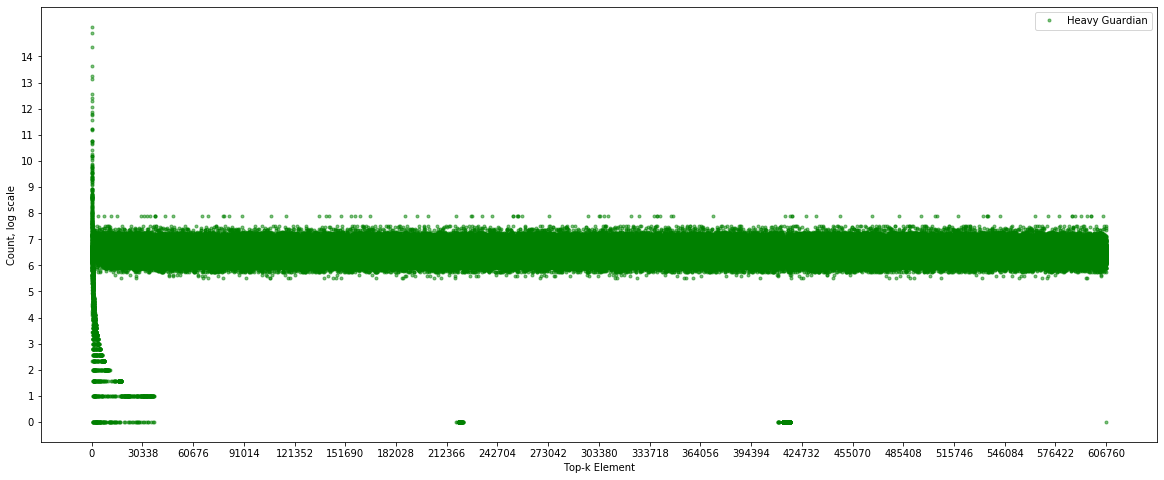

In [5]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=500
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  24.838 seconds.
600 nodes, per-node= <8 heavy+ 16 light>
Total size 639.8046875 kbytes, 
Heavy part: 536.6796875 kbytes
Light part: 103.125 kbytes
Precision:  0.905
heavy_are: 0.112,heavy_aae: 6.762
all_are:  70.243,all_aae:  72.858
Estimate time:  11.438 seconds.


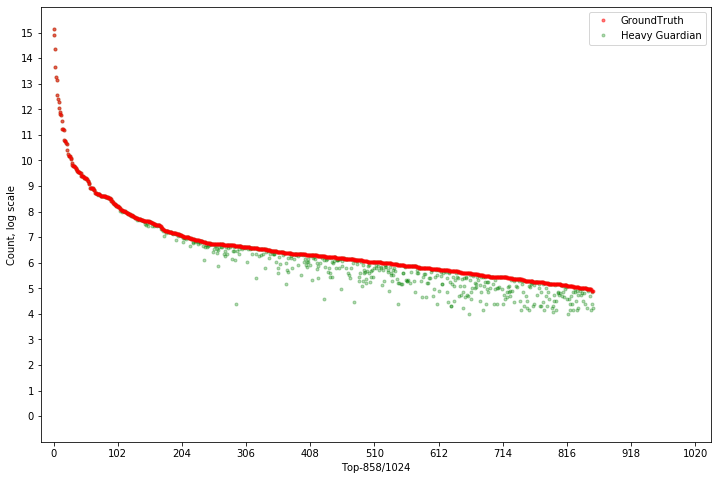

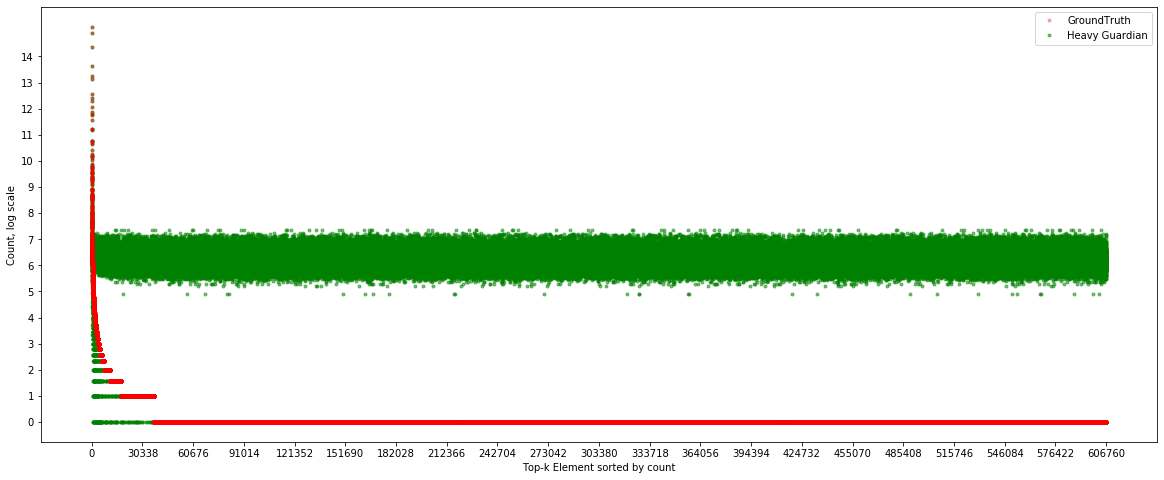

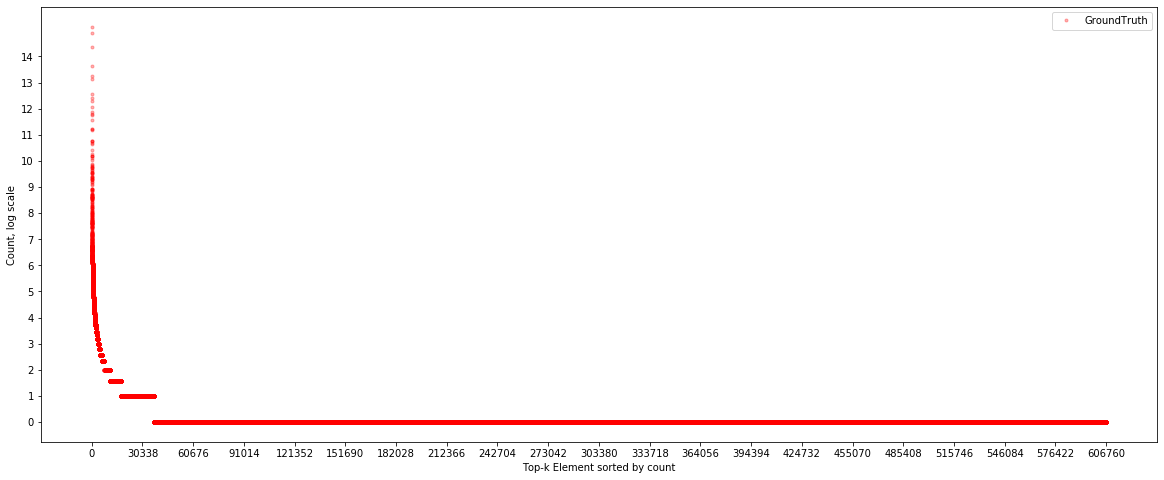

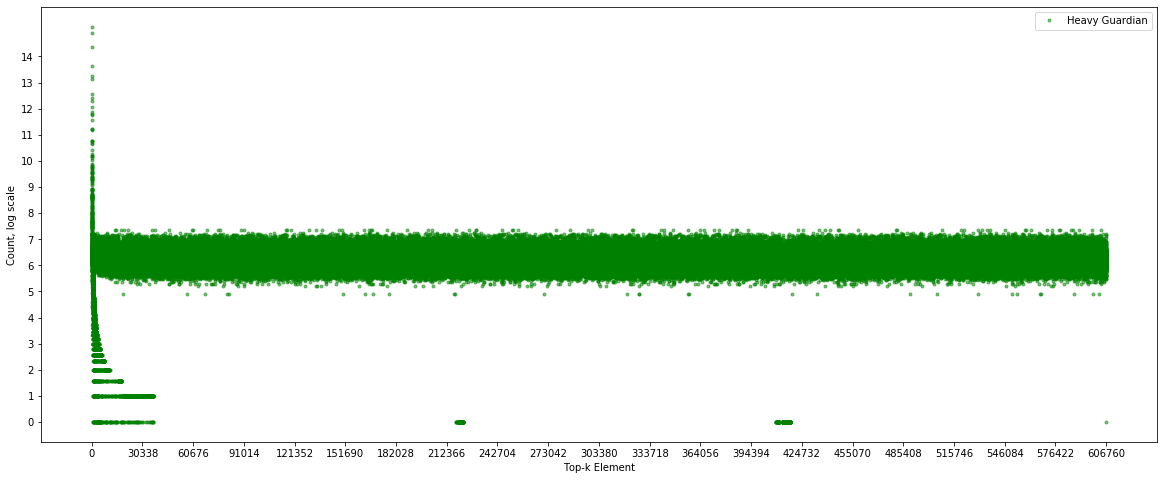

In [6]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=600
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  23.241 seconds.
700 nodes, per-node= <8 heavy+ 16 light>
Total size 871.9609375 kbytes, 
Heavy part: 751.6484375 kbytes
Light part: 120.3125 kbytes
Precision:  0.929
heavy_are: 0.097,heavy_aae: 5.765
all_are:  59.782,all_aae:  61.995
Estimate time:  10.834 seconds.


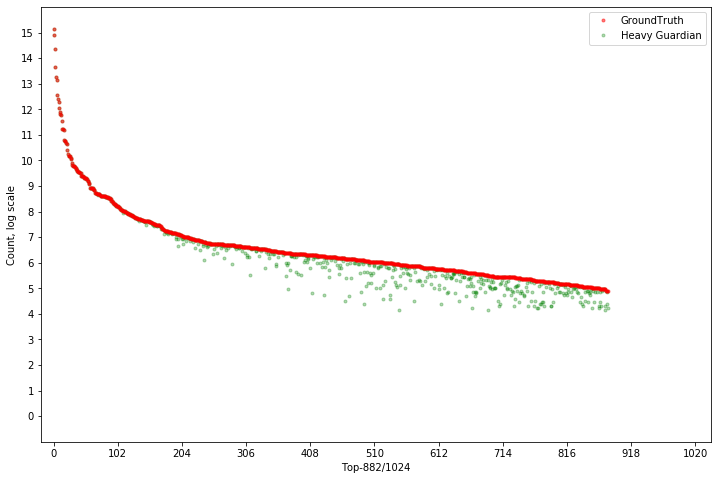

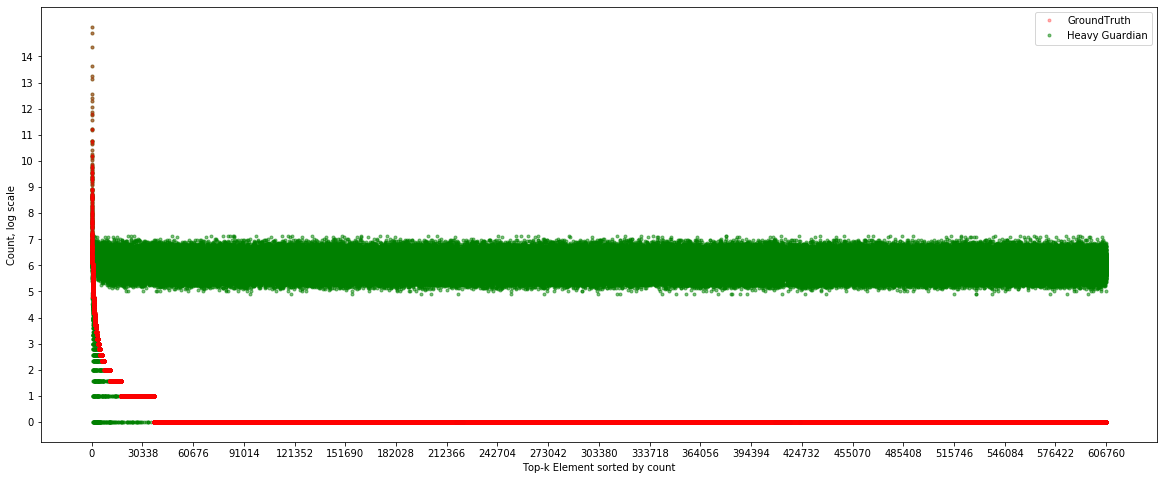

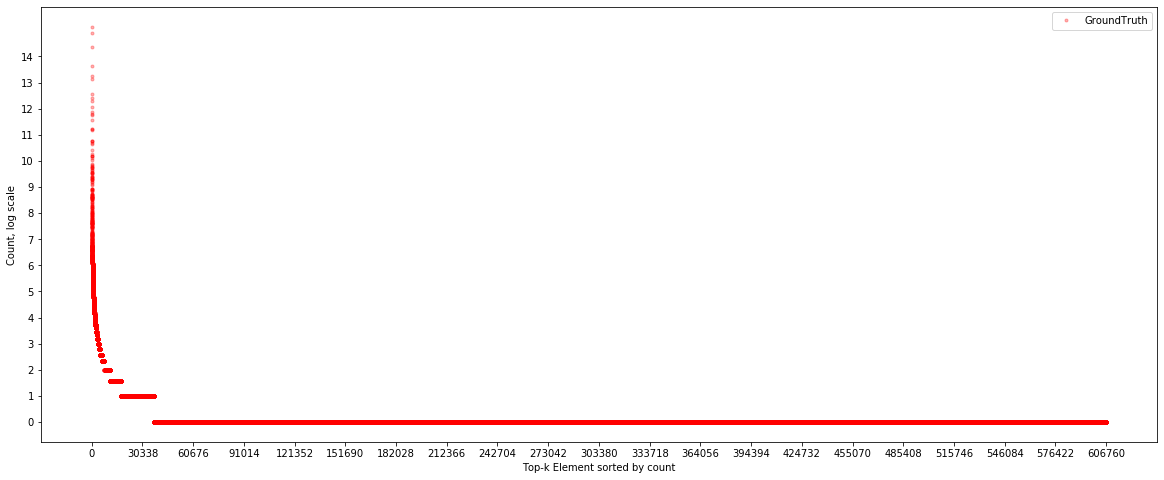

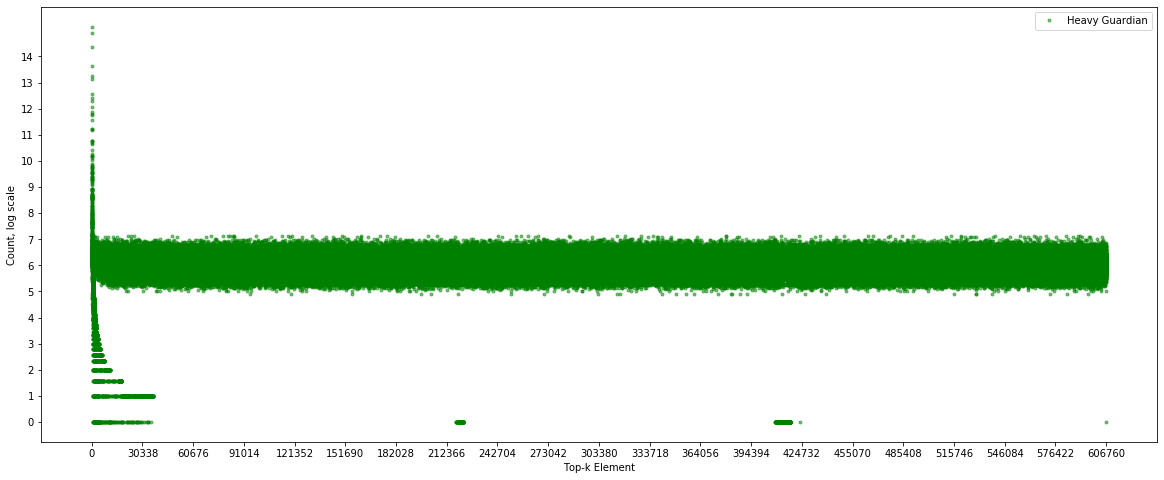

In [7]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=700
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  23.614 seconds.
800 nodes, per-node= <8 heavy+ 16 light>
Total size 958.9140625 kbytes, 
Heavy part: 821.4140625 kbytes
Light part: 137.5 kbytes
Precision:  0.955
heavy_are: 0.086,heavy_aae: 5.101
all_are:  52.010,all_aae:  53.919
Estimate time:  10.936 seconds.


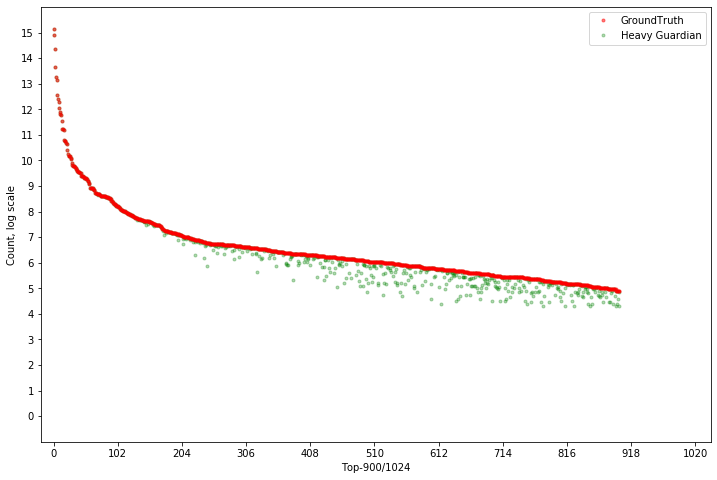

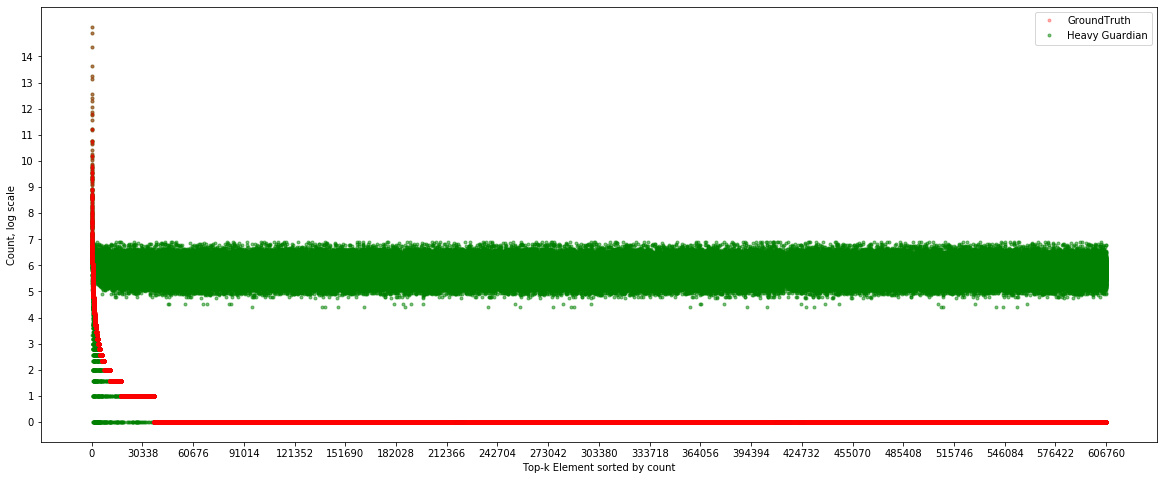

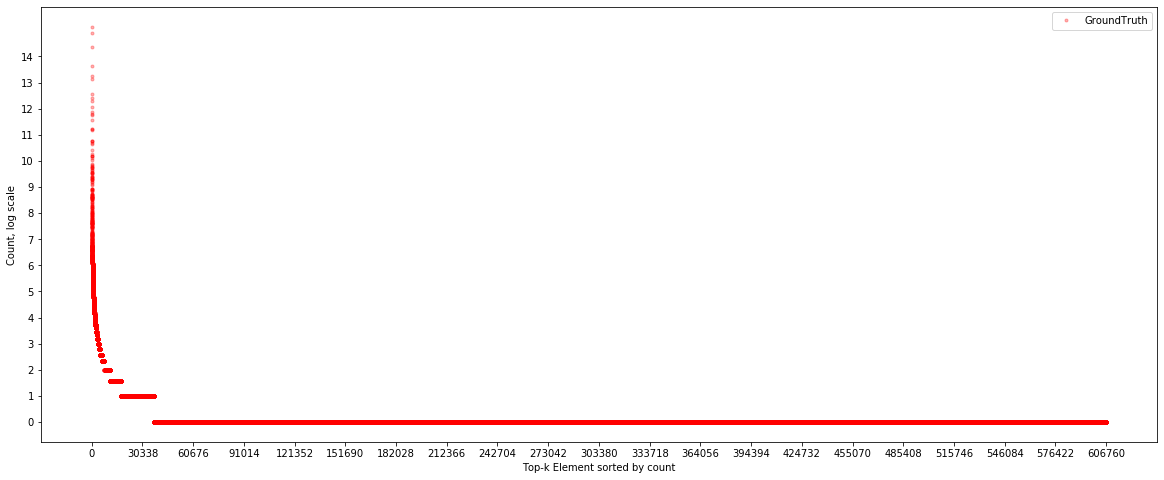

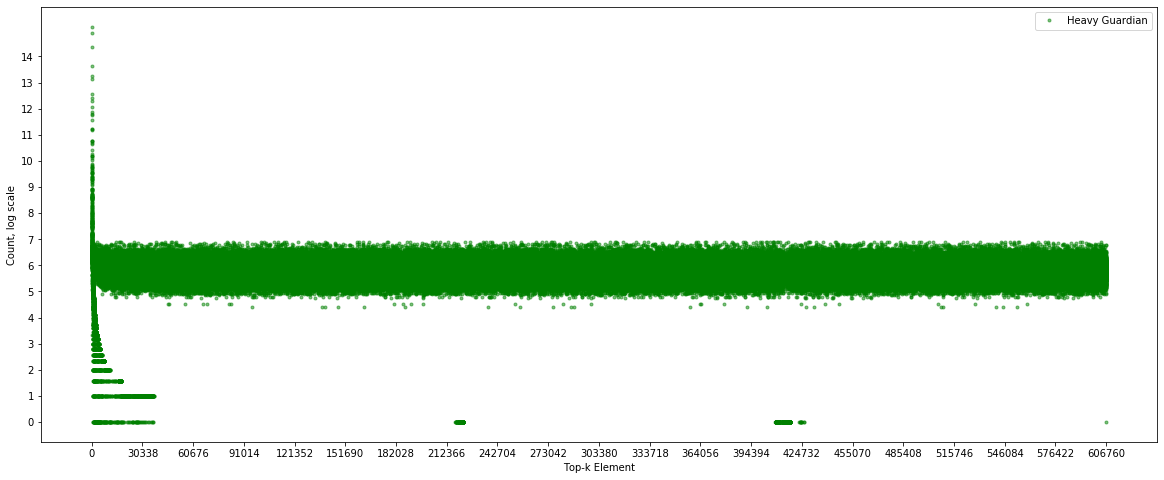

In [8]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=800
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time:  24.125 seconds.
900 nodes, per-node= <8 heavy+ 16 light>
Total size 1037.0859375 kbytes, 
Heavy part: 882.3984375 kbytes
Light part: 154.6875 kbytes
Precision:  0.957
heavy_are: 0.074,heavy_aae: 4.272
all_are:  45.989,all_aae:  47.670
Estimate time:  10.816 seconds.


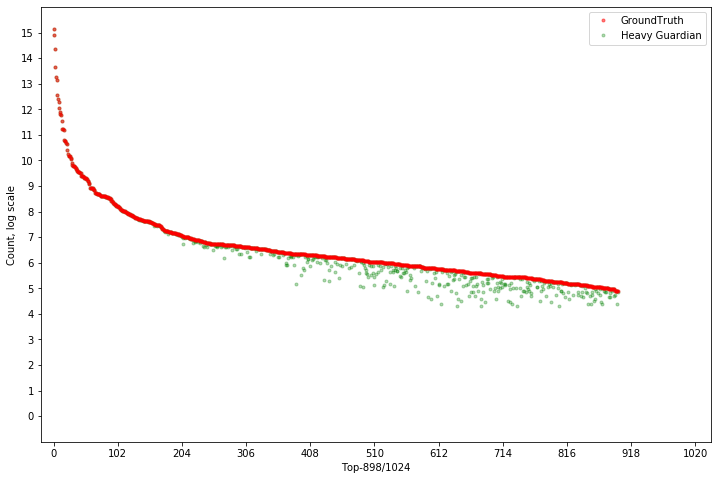

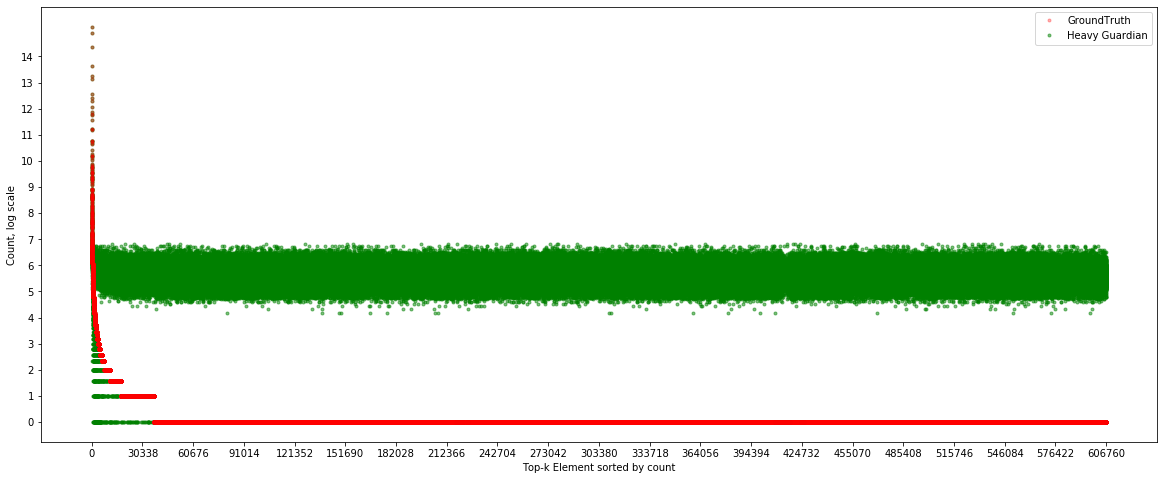

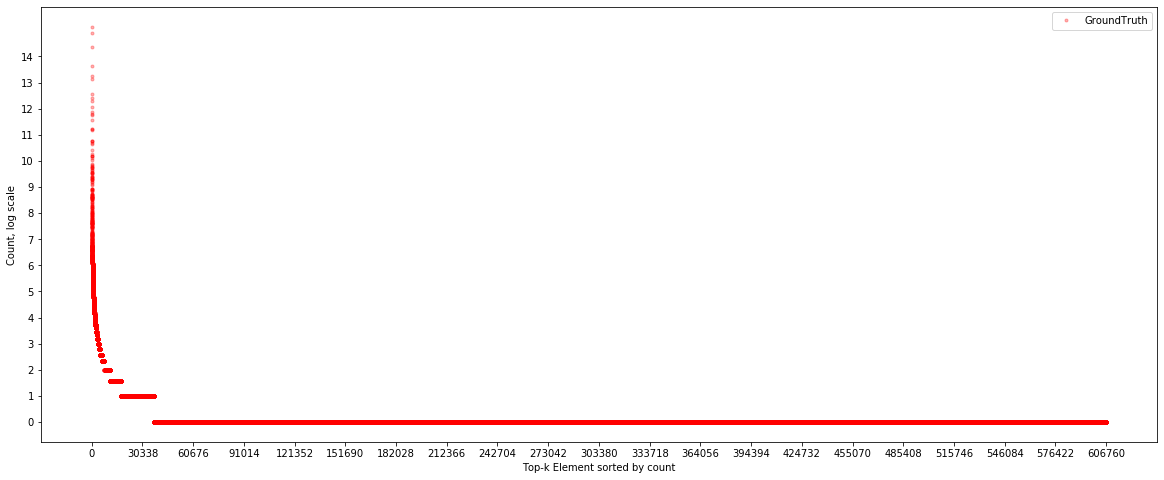

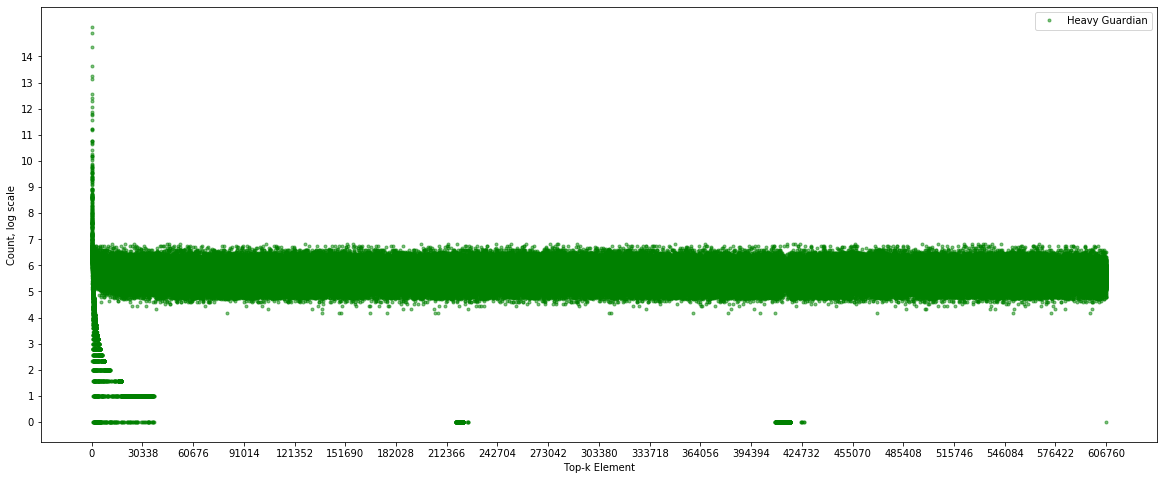

In [9]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np

from pympler import asizeof

dataset='kosarak'

# =============================dataset path and file=============================

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# =============================Initialize=============================
heavy_size=8
light_size=16
size=900
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)
